<a href="https://colab.research.google.com/github/aditya26droid/KC_USA-Price-Prediction/blob/main/KC_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv("/content/kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.drop('id', axis = 1, inplace = True)
data.drop('date', axis = 1, inplace = True)

In [7]:
data.dropna(inplace = True)

In [8]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,0.082775,0.251320,-0.144647,1.000000,0.755924,0.168375,0.446958,0.014412,-0.184842,0.114102,0.198349,0.713197,0.119243


In [9]:
##We will impute our outliers
q1=data["sqft_above"].quantile(0.25)
q3=data["sqft_above"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
data["sqft_above"] = np.where(np.logical_or(data["sqft_above"] > upper,data["sqft_above"]<lower), np.mean(data["sqft_above"]), data["sqft_above"])

#sns.boxplot(data["sqft_above"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


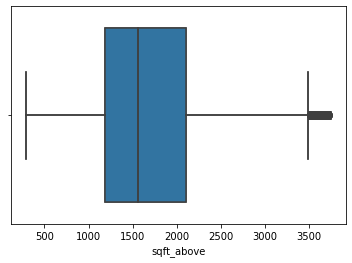

In [19]:
sns.boxplot(data["sqft_above"])
#We will impute our outliers
q1=data["bathrooms"].quantile(0.25)
q3=data["bathrooms"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
data["bathrooms"] = np.where(np.logical_or(data["bathrooms"] > upper,data["bathrooms"]<lower), np.mean(data["bathrooms"]), data["bathrooms"])

sns.boxplot(data["sqft_above"])
data.info()

In [13]:
data=data.dropna()

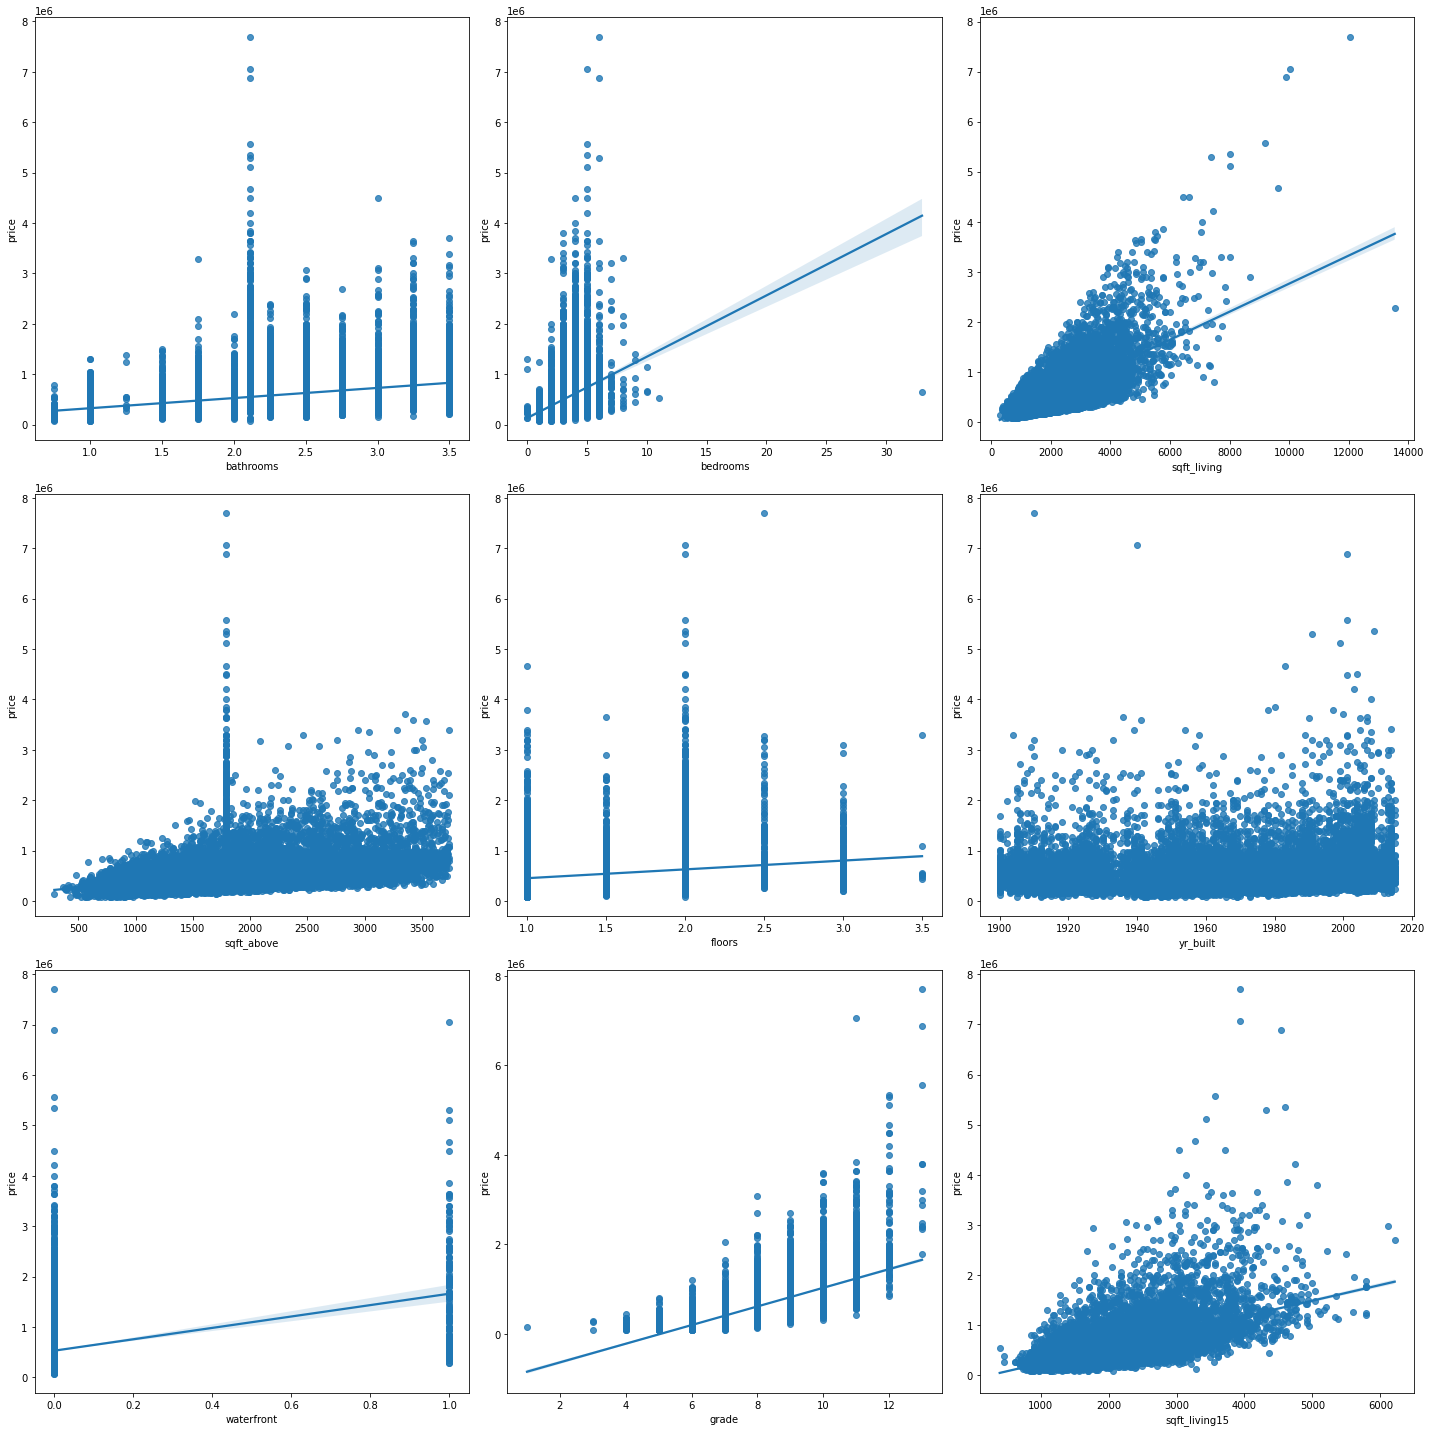

In [20]:
datafig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = data['price'], x = data['bathrooms'], ax = axs[0, 0])
sns.regplot(y = data['price'], x = data['bedrooms'], ax = axs[0, 1])
sns.regplot(y = data['price'], x = data['sqft_living'], ax = axs[0, 2])
sns.regplot(y = data['price'], x = data['sqft_above'], ax = axs[1, 0])
sns.regplot(y = data['price'], x = data['floors'], ax = axs[1, 1])
sns.regplot(y = data['price'], x = data['yr_built'], ax = axs[1, 2])
sns.regplot(y = data['price'], x = data['waterfront'], ax = axs[2, 0])
sns.regplot(y = data['price'], x = data['grade'], ax = axs[2, 1])
sns.regplot(y = data['price'], x = data['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

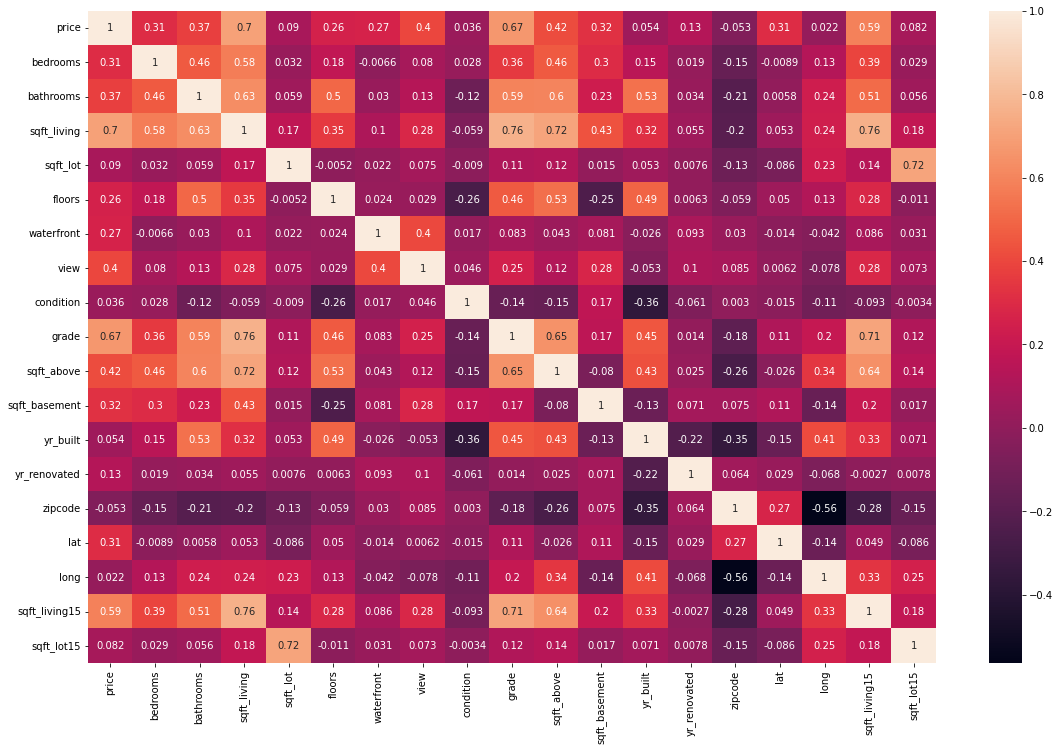

In [21]:
plt.figure(figsize = (19, 12))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [15]:
features = data.drop('price', axis = 1)
target = data['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 5)
print("Train features shape : ", train_features.shape)
print("Train target shape : ", train_target.shape)
print("Test features shape : ", test_features.shape)
print("Test target shape : ", test_target.shape)

Train features shape :  (17288, 18)
Train target shape :  (17288,)
Test features shape :  (4323, 18)
Test target shape :  (4323,)


In [16]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [17]:
print("Model intercept : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
 print(features.columns[i], ": ", model.coef_[i])

Model intercept :  9680138.455097508 

Model coefficient:  [-2.28575045e+04 -1.38676679e+04  2.52905443e+02  1.55839734e-01
  3.95879928e+04  5.27033823e+05  5.02269295e+04  3.16423556e+04
  9.92945074e+04 -1.08897305e+02 -8.46588989e+01 -2.10748589e+03
  3.36049801e+01 -5.99377947e+02  5.91610004e+05 -2.00040272e+05
  3.16019848e+01 -4.63762052e-01] 

bedrooms :  -22857.504518613725
bathrooms :  -13867.667926306971
sqft_living :  252.90544311382808
sqft_lot :  0.15583973406268453
floors :  39587.99279740005
waterfront :  527033.8231399807
view :  50226.92952617834
condition :  31642.355562829292
grade :  99294.50743153211
sqft_above :  -108.89730530426303
sqft_basement :  -84.65889894126575
yr_built :  -2107.4858861955863
yr_renovated :  33.60498009676633
zipcode :  -599.3779472522266
lat :  591610.0036218826
long :  -200040.27170825528
sqft_living15 :  31.60198484482388
sqft_lot15 :  -0.4637620516843588


In [18]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model training performance:
---------------------------
RMSE is 196683.72480371303
R2 score is 0.7051518178152085


Model testing performance:
--------------------------
RMSE is 199867.29905623329
R2 score is 0.7320533564361364
